In [6]:
#Se realiza las importaciones de las librerias necesarias para realizar el trabajo, para eso lo realizamos con Import + libreria

import pandas as pds
import seaborn as born
import matplotlib.pyplot as mtplot
%matplotlib inline
#Organizar las graficas 2d y buscarle el tipo de letra 
font = {'size': 12}
mtplot.rc('font', **font)


#Ahora vamos a cargar la informacion mediante seleccion from y se realiza la importacion de las librerias 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.

In [100]:
#Vamos a cargar el Excel y la DataSet para poderlo analizarlo, poder ejecutarlo y poder obtener los datos de mas 
variable1 = pds.read_csv('Titanic-Dataset.csv')

In [102]:
#Exploracion Explorativa de Datos
variable1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [104]:
#Sacar los datos
variable1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
#Vamos a realizar la informacion estadisticas descriptiva de la variables numericas 

variable1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
variable1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Sacar la media y las edades
mediaedad = round(variable1['Age'].mean())
variable1['Age'] = variable1['Age'].fillna(mediaedad)
variable1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.

In [22]:
variable1['Survived'] = variable1['Survived'].map({0:'No', 1:'Yes'})
variable1.head(12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,No,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,No,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,No,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
#Vamos a obtener los valores como tal, practicamente es un filtro para buscar ciertos datos
variable1['Embarked']=variable1['Embarked'].map({
    'S':'Southampton',
    'C': 'Cherbourg',
    'Q':'Queenstown'
})
variable1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


## Luego de separar los datos, se realizara un cuadro para entender la informacion que se obtiene 

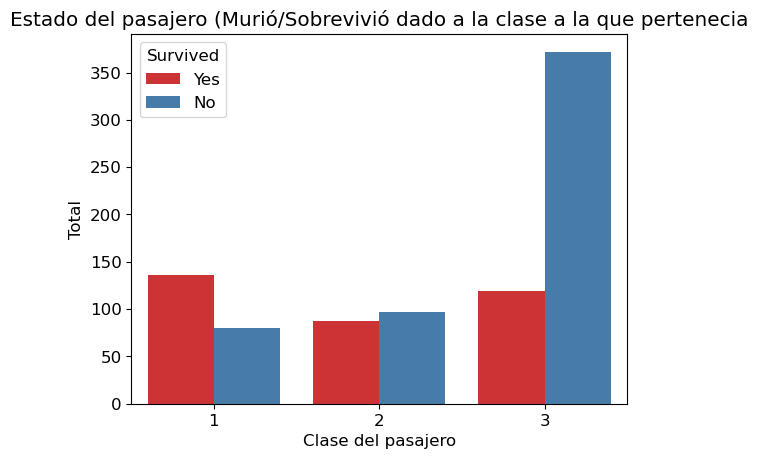

In [27]:
variable1.groupby(['Pclass', 'Survived'])['Survived'].count()
ax=born.countplot(x='Pclass', hue='Survived', palette='Set1', data=variable1)
ax.set(title='Estado del pasajero (Murió/Sobrevivió dado a la clase a la que pertenecia',
       xlabel='Clase del pasajero', ylabel='Total')
mtplot.show()

## La mayoria de los pasajeros, eran de primera y segunda clase 

## 3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.

In [31]:
 #Se obtiene el genero de supervivencia 
variable1.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  No           81
        Yes         233
male    No          468
        Yes         109
Name: Survived, dtype: int64

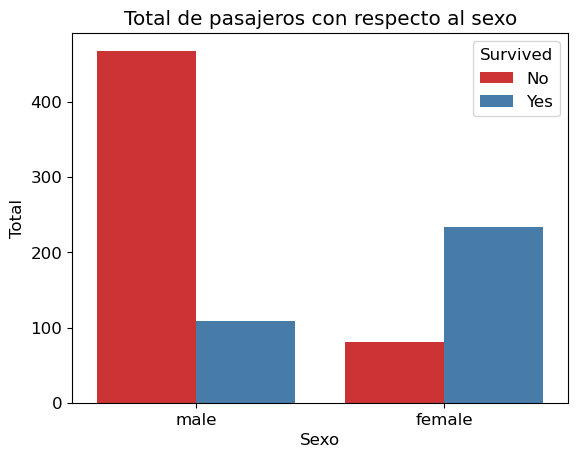

In [32]:
#Se obtiene el genero

ax=born.countplot(x='Sex', hue='Survived', palette='Set1', data=variable1)
ax.set(title='Total de pasajeros con respecto al sexo',
       xlabel='Sexo', ylabel='Total')
mtplot.show()

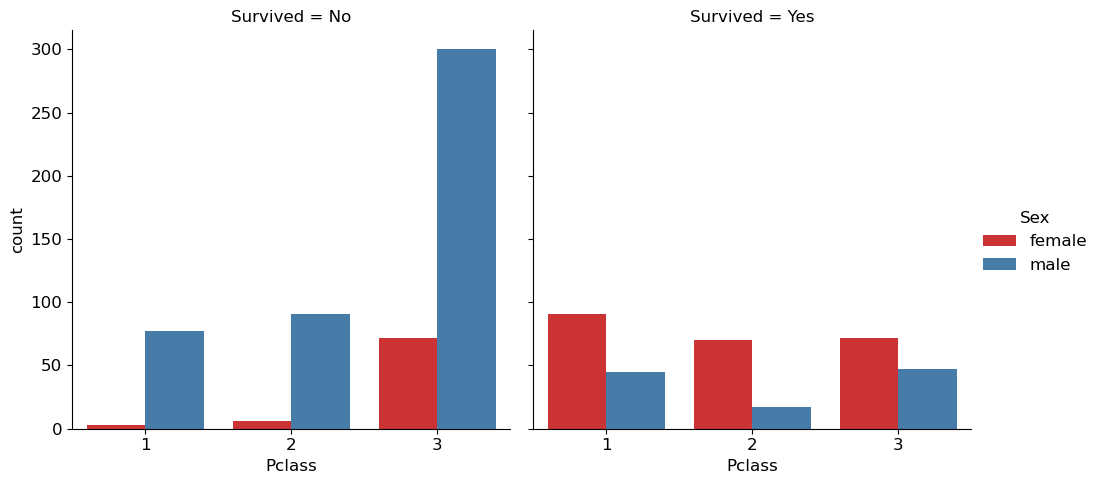

In [34]:
#graficas de supervivencia en primer y segundo grado 
ax=born.catplot(x='Pclass', hue='Sex', col='Survived', palette='Set1',
               data=variable1, kind='count')
mtplot.show()

## Podemos observar que las mujeres tubieron una capacidad de supervivencia mas aceptable del primer al segundo grado, a comparacion de los hombres que tubieron una tasa de mortalidad alta que llega hasta tercer grado

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [38]:
#Se obtine los datos de los supervivientes de las embarcaciones
pds.crosstab(variable1['Embarked'],variable1['Survived'])

Survived,No,Yes
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


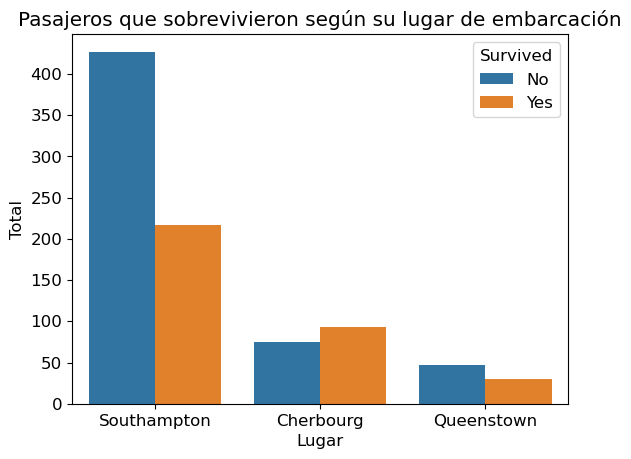

In [39]:
ax=born.countplot(x='Embarked',hue='Survived', data=variable1)
ax.set(title='Pasajeros que sobrevivieron según su lugar de embarcación',
       xlabel='Lugar', ylabel='Total')
mtplot.show()

La mayoria de los pasajeros que se montaron al Tren, no sobrevivienron, dado que la mayor parte de la tripulacion se encontraba por el Southampton

In [41]:
variable1[variable1['Age']<18]['Age'].count()

113

In [43]:
intervaloEdad1=variable1[variable1['Age']<18].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad1

,Age
Pclass,
1,12
2,23
3,78


In [45]:
intervaloEdad2=variable1[(variable1['Age']>18) & (variable1['Age']<=50) ].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad2

,Age
Pclass,
1,161
2,140
3,387


In [46]:
def funcPie(values):
    val=iter(values)
    return lambda pct: f"{pct:.1f}% ({next(val)})"

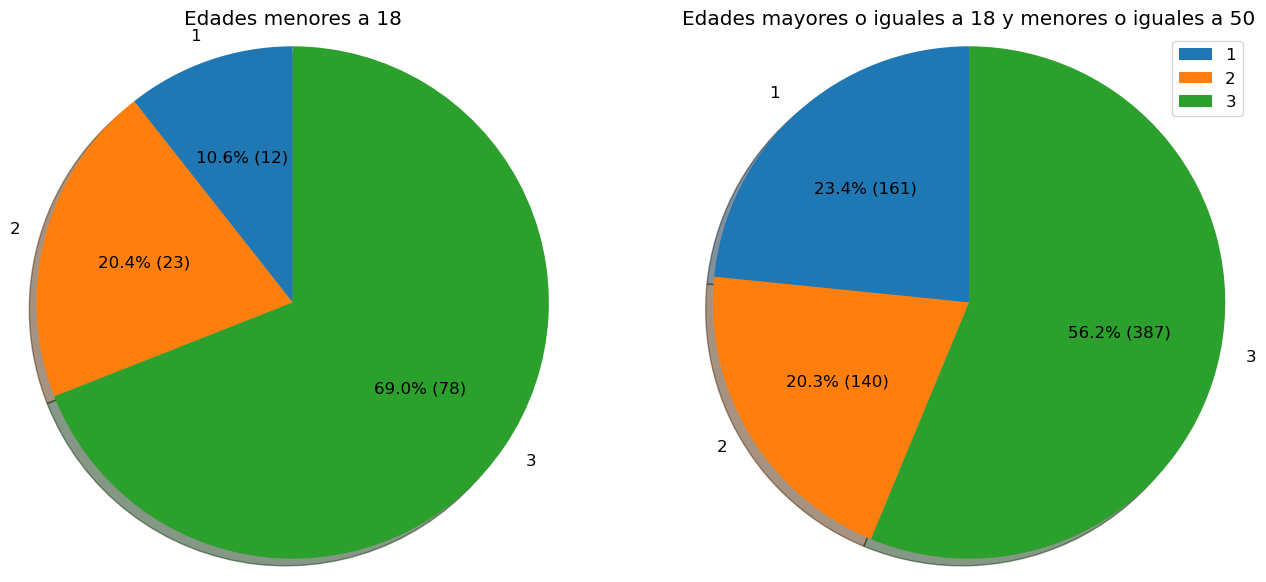

In [106]:
#Creacion de diagrama de circulo para indagar la natalidad de muertes por edad

fig, ax=mtplot.subplots(1, 2, figsize = (16, 7))
ax[0].pie(intervaloEdad1['Age'].to_list(), labels=intervaloEdad1.index.to_list(),
          autopct=funcPie(intervaloEdad1['Age'].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Edades menores a 18')
ax[1].pie(intervaloEdad2['Age'].to_list(), labels=intervaloEdad2.index.to_list(),
          autopct=funcPie(intervaloEdad2['Age'].to_list()), shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Edades mayores o iguales a 18 y menores o iguales a 50')
mtplot.legend()
mtplot.show()

Se puede verificar que las edades de pasajeros menores a 18 años es un 10,6% (12), en cambio los pasajeros mayores de edad o igual a 18 años es mayor a comparacion de pasajeros menores de edad.

In [108]:
#Vamos a buscar las variables y diviendo la inofrmacion para agregarlo al modelo, practicamente entrenando
variable1['Survived'].replace(('No', 'Yes'), (0, 1), inplace=True)
variable1['Sex'].replace(('male', 'female'), (0, 1), inplace=True)
variable1.head()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9972\1324797601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  variable1['Survived'].replace(('No', 'Yes'), (0, 1), inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9972\1324797601.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.


In [54]:
#Para el modelo 
info = variable1.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')
print(info.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [56]:
info = pds.get_dummies(info, columns=['Embarked'], drop_first=True)

In [58]:
#Vamos a realizar la divicion del DataSet

X_train, X_test, y_train, y_test = train_test_split(info.drop('Survived',axis=1),
                                                    info['Survived'], test_size=0.30,
                                                    random_state=101)

In [60]:
print(X_train, y_train)

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  \
520          521       1    1  30.0      0      0   93.5000   
510          511       3    0  29.0      0      0    7.7500   
446          447       2    1  13.0      0      1   19.5000   
2              3       3    1  26.0      0      0    7.9250   
691          692       3    1   4.0      0      1   13.4167   
..           ...     ...  ...   ...    ...    ...       ...   
575          576       3    0  19.0      0      0   14.5000   
838          839       3    0  32.0      0      0   56.4958   
337          338       1    1  41.0      0      0  134.5000   
523          524       1    1  44.0      0      1   57.9792   
863          864       3    1  30.0      8      2   69.5500   

     Embarked_Queenstown  Embarked_Southampton  
520                False                  True  
510                 True                 False  
446                False                  True  
2                  False                  True 

In [62]:
#Vamos a entrenar el modelo segun las idicaciones de la guia

from sklearn.linear_model import LogisticRegression
 
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

 Se evalua el rendimiento del modelo y se realiza la exactitud para el resultado seguro

In [66]:
from sklearn.metrics import accuracy_score
 
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7798507462686567


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

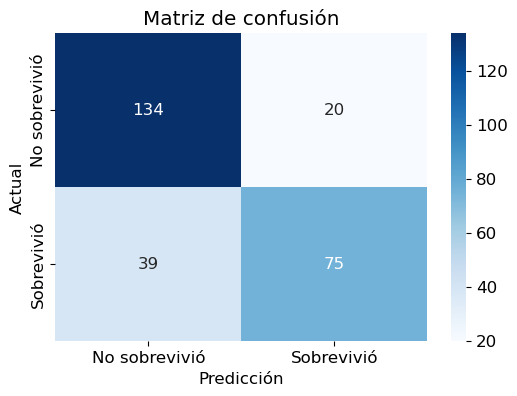

In [71]:
# Importacion de librerias 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
 
 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

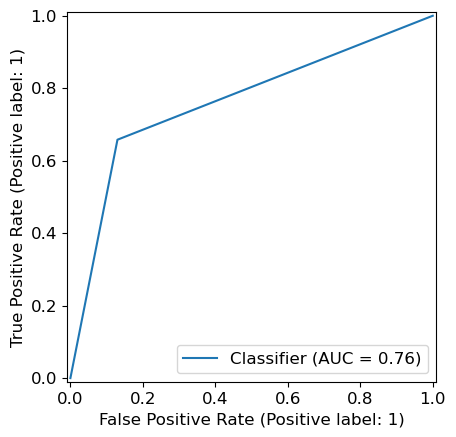

In [72]:
#Esta seria la curba de precicion de modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()